# 202202_SimplestRun

# 0. Initialize

In [8]:
import os; from importlib import reload;
from utils import constants
%cd {os.environ['PROJECT_PATH']}

import warnings
warnings.filterwarnings('ignore')

/app


# 1. Connect & Load Data

In [5]:
from data import load_data; reload(load_data)

dfBpAll, dfImuAll = load_data.load_dataframe_from_mat(folder='data/raw_mat/', pattern='LLV')
display('------ dfBpAll ------')
display(dfBpAll)
display('------ dfImuAll ------')
display(dfImuAll)

'------ dfBpAll ------'

,ts,pp,sbp,dbp,ecgTs,file,patient,test_type,test_num
0,0 days 00:00:00,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
1,0 days 00:00:00.001000,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
2,0 days 00:00:00.002000,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
3,0 days 00:00:00.003000,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
4,0 days 00:00:00.004000,NaN,NaN,NaN,0.0,sub019_LLV1.mat,sub019,LLV,1
...,...,...,...,...,...,...,...,...,...
1161392,0 days 00:00:26.096000,NaN,NaN,NaN,0.0,sub551_LLV3.mat,sub551,LLV,3
1161393,0 days 00:00:26.097000,NaN,NaN,NaN,0.0,sub551_LLV3.mat,sub551,LLV,3
1161394,0 days 00:00:26.098000,NaN,NaN,NaN,0.0,sub551_LLV3.mat,sub551,LLV,3
1161395,0 days 00:00:26.099000,NaN,NaN,NaN,0.0,sub551_LLV3.mat,sub551,LLV,3


'------ dfImuAll ------'

,ts,ax,ay,az,gx,gy,gz,file,patient,test_type,test_num
0,0 days 00:00:00,-1.139640,1.127669,-9.926359,1.060486,-0.091553,-0.175476,sub019_LLV1.mat,sub019,LLV,1
1,0 days 00:00:00.002000,-1.130063,1.072602,-9.991003,1.449585,-0.389099,-0.205994,sub019_LLV1.mat,sub019,LLV,1
2,0 days 00:00:00.005000,-1.175553,1.098938,-9.998185,1.434326,-0.526428,-0.610352,sub019_LLV1.mat,sub019,LLV,1
3,0 days 00:00:00.007000,-1.175553,1.110909,-10.007762,1.274109,-0.564575,-0.289917,sub019_LLV1.mat,sub019,LLV,1
4,0 days 00:00:00.008000,-1.156399,1.089362,-9.981426,1.350403,-0.282288,-0.518799,sub019_LLV1.mat,sub019,LLV,1
...,...,...,...,...,...,...,...,...,...,...,...
648867,0 days 00:00:26.092000,-0.248997,0.517148,-10.005368,0.228882,1.838684,-0.297546,sub551_LLV3.mat,sub551,LLV,3
648868,0 days 00:00:26.094000,-0.272939,0.524330,-10.036492,0.053406,2.082825,-0.381470,sub551_LLV3.mat,sub551,LLV,3
648869,0 days 00:00:26.096000,-0.275333,0.514753,-10.036492,0.167847,2.197266,-0.312805,sub551_LLV3.mat,sub551,LLV,3
648870,0 days 00:00:26.098000,-0.246603,0.536301,-9.993397,-0.091553,2.578735,-0.534058,sub551_LLV3.mat,sub551,LLV,3


# 2. Process Signal Data in Heartbeats

In [6]:
from data import preprocess; reload(preprocess)

dfAll = preprocess.merge_imu_vcg_with_heartbeats(dfBpAll, dfImuAll)
display('------ dfAll ------')
display(dfAll)

'------ dfAll ------'

,file,ax,ay,az,gx,gy,gz,heartbeat,patient,test_type,test_num,tsCC,ts,pp,sbp,dbp
0,sub019_LLV1.mat,-1.213860,1.086967,-9.967060,1.235962,-0.991821,-0.381470,3.0,sub019,LLV,1,True,0 days 00:00:02.235000,69.087044,132.656695,63.569650
1,sub019_LLV1.mat,-1.209870,1.050456,-9.969455,1.022339,-0.549316,0.160217,3.0,sub019,LLV,1,True,0 days 00:00:02.240000,69.087044,132.656695,63.569650
2,sub019_LLV1.mat,-1.213860,1.091756,-9.914388,0.999451,-0.556946,-0.411987,3.0,sub019,LLV,1,True,0 days 00:00:02.245000,69.087044,132.656695,63.569650
3,sub019_LLV1.mat,-1.228225,1.089362,-9.861716,0.839233,0.000000,-0.045776,3.0,sub019,LLV,1,True,0 days 00:00:02.250000,69.087044,132.656695,63.569650
4,sub019_LLV1.mat,-1.197101,1.057439,-9.911994,0.701904,0.015259,-0.267029,3.0,sub019,LLV,1,True,0 days 00:00:02.255000,69.087044,132.656695,63.569650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210122,sub551_LLV3.mat,-0.196325,0.459687,-10.098742,-0.930786,1.640320,0.061035,34.0,sub551,LLV,3,True,0 days 00:00:25.270000,52.246650,131.569166,79.322515
210123,sub551_LLV3.mat,-0.241814,0.476446,-10.060434,-0.816345,1.594543,0.015259,34.0,sub551,LLV,3,True,0 days 00:00:25.275000,52.246650,131.569166,79.322515
210124,sub551_LLV3.mat,-0.205901,0.442927,-9.986214,-0.671387,1.647949,-0.221252,34.0,sub551,LLV,3,True,0 days 00:00:25.280000,52.246650,131.569166,79.322515
210125,sub551_LLV3.mat,-0.192733,0.492008,-10.026916,-0.595093,2.113342,-0.248909,34.0,sub551,LLV,3,True,0 days 00:00:25.285000,52.246650,131.569166,79.322515


# 3. Define Data Splits (Patients, Heartbeats, etc)

In [45]:
from models import experiments

dfImu = dfAll[constants.INDICIES + constants.IMU_COLS]
dfBp = dfAll[constants.INDICIES + constants.BP_COLS]

sampleRandTestInds = experiments.split_by_random(dfImu, dfBp)
sampleExpDfs = experiments.get_experiment(sampleRandTestInds[0], dfImu, dfBp)

print('\n\n'.join([f'''
----- {k}:{v.shape} ------
    heartbeats:{v.groupby(constants.INDICIES).count().shape[0]}
    columns:{v.columns}
    first row : {v.iloc[0].to_list()}
'''
    for k,v in sampleExpDfs.items()
]))


----- train_x:(168314, 10) ------
    heartbeats:987
    columns:Index(['file', 'heartbeat', 'index', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'ts'], dtype='object')
    first row : ['sub239_LLV3.mat', 17.0, 91069, -1.3407527923943998, 0.24420854432897998, -9.76594757174421, 1.13677978497, 0.41961669915, 0.38909912103, Timedelta('0 days 00:00:16.914000')]



----- train_y:(168314, 6) ------
    heartbeats:987
    columns:Index(['file', 'heartbeat', 'index', 'pp', 'sbp', 'dbp'], dtype='object')
    first row : ['sub239_LLV3.mat', 17.0, 91069, 60.84115564453285, 127.41911258633849, 66.57795694180565]



----- test_x:(41813, 10) ------
    heartbeats:247
    columns:Index(['file', 'heartbeat', 'index', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'ts'], dtype='object')
    first row : ['sub257_LLV3.mat', 26.0, 114328, -0.5422866204951988, 1.3227962817819556, -10.070011151447892, -0.003814697264898352, 2.1743774410499053, -0.12207031248017618, Timedelta('0 days 00:00:25.371000')]



----- test_y:(41813

# 4. Modeling Pipelines (Baselines & Analytical)

In [10]:
import sklearn
from sklearn.pipeline import Pipeline

In [22]:
from features import tsfel_vectorizer, simple as features_simple

tsExplodeTransform = preprocess.FunctionTransformer(partial(preprocess.explode_3d, data_cols=['az','ax']))
tsVectorizeSimpleTransform = preprocess.FunctionTransformer(partial(features_simple.vectorize_mean_std))
tsVectorLookupTransform = preprocess.FunctionTransformer(partial(features_simple.vectorize_mean_std))

from models import baselines, analytical_mvd

pipe_random = Pipeline([('transform', tsExplodeTransform), ('model', baselines.RandomRegressor())])
pipe_mean = Pipeline([('transform', tsExplodeTransform), ('model', baselines.DummyRegressor())])
pipe_vect_simple = Pipeline([('transform', tsVectorizeSimpleTransform), ('model', sklearn.ensemble.RandomForestRegressor())])
# pipe_mvd = Pipeline([('scaler', tsExplodeTransform), ('rand', analytical_mvd.AnalyticalBPEstimator())])     ##TODO : Has a bug.. I think interpolation is broken?

In [37]:
from features import tsfel_vectorizer; reload(tsfel_vectorizer)
from sklearn import feature_selection
dfVects = pd.read_feather('data/vectors/dfImuVects-LLV.feather')
# tsVectorLookupTransform = preprocess.FunctionTransformer(partial(features_simple.vectorize_mean_std))
tsVectorLookupTransform = sklearn.preprocessing.FunctionTransformer(tsfel_vectorizer.VectorLookup(dfVects))

pipe_vect_tsfel = Pipeline([
    ('transform', tsVectorLookupTransform), 
    ('feature_selection_simple', feature_selection.VarianceThreshold()),
    ('feature_selection', feature_selection.SelectFromModel(sklearn.linear_model.LinearRegression())),
    ('model', sklearn.ensemble.GradientBoostingRegressor())])

In [39]:
from sklearn.metrics import mean_absolute_error

for pipe in [pipe_vect_tsfel, pipe_random, pipe_mean, pipe_vect_simple]:
    pipe.fit(sampleExpDfs['train_x'], sampleExpDfs['train_y'].groupby(constants.INDICIES)['sbp'].mean())
    score = mean_absolute_error(
        pipe.predict(sampleExpDfs['test_x']),
        sampleExpDfs['test_y'].groupby(constants.INDICIES)['sbp'].mean()
    )
    print('Achieved Score (MAE) : ', score, pipe)

Achieved Score (MAE) :  12.732648008040307 Pipeline(steps=[('transform',
                 FunctionTransformer(func=<function VectorLookup.<locals>.vectLookup at 0x7fb2ca6db280>)),
                ('feature_selection_simple', VarianceThreshold()),
                ('feature_selection',
                 SelectFromModel(estimator=LinearRegression())),
                ('model', GradientBoostingRegressor())])
Achieved Score (MAE) :  16.93516295511893 Pipeline(steps=[('transform',
                 FunctionTransformer(func=functools.partial(<function explode_3d at 0x7fb2d37fa820>, data_cols=['az', 'ax']))),
                ('model',
                 <models.baselines.RandomRegressor object at 0x7fb2df4acd00>)])
Achieved Score (MAE) :  12.381454356196016 Pipeline(steps=[('transform',
                 FunctionTransformer(func=functools.partial(<function explode_3d at 0x7fb2d37fa820>, data_cols=['az', 'ax']))),
                ('model', DummyRegressor())])
Achieved Score (MAE) :  12.7222329874244

# 5. Evaluation

In [36]:
pipe = pipe_vect_simple

train_y = sampleExpDfs['train_y'].groupby(constants.INDICIES)['dbp'].mean()
test_y = sampleExpDfs['test_y'].groupby(constants.INDICIES)['dbp'].mean()

pipe.fit(sampleExpDfs['train_x'], train_y)
preds = pipe.predict(sampleExpDfs['test_x'])

score_mae = mean_absolute_error(preds, test_y)
print('Achieved Score (MAE) : ', score)

Achieved Score (MAE) :  9.0131047069334


<AxesSubplot:xlabel='target', ylabel='preds'>

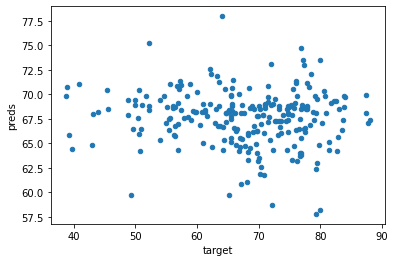

In [37]:
pd.DataFrame([preds, test_y], ['preds','target']).T.plot.scatter(1,0)